# Исследование объявлений о продаже квартир

В моем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно провести комплексный анализ данных и определить рыночную стоимость объектов недвижимости. Основная задача — установить параметры, влияющие на финальную стоимость недвижимости. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка.

## Первичный анализ имеющихся данных

In [1]:
# Импортируем библиотеки, которые будут использоваться в ходе исследования
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('real_estate_data.csv', sep ='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Описание имеющихся переменных. Название-количество-тип**

* total_images - 23699 - int64 - число фотографий квартиры в объявлении
* last_price - 23699 - float64 - цена на момент снятия с публикации
* total_area - 23699 - float64 - общая площадь квартиры в квадратных метрах (м²)
* first_day_exposition - 23699 - object - дата публикации
* rooms - 23699 - int64 - число комнат
* ceiling_height - 14504 - float64 - высота потолков (м)
* floors_total - 23613 - float64 - всего этажей в доме
* living_area - 21796 - float64 - жилая площадь в квадратных метрах (м²)
* floor - 23699 - int64 - этаж
* is_apartment - 2775  - object - апартаменты (булев тип)
* studio - 23699   bool - квартира-студия (булев тип)
* open_plan - 23699 - bool - свободная планировка (булев тип)
* kitchen_area - 21421 - float64 - площадь кухни в квадратных метрах (м²)
* balcony - 12180 - float64 - число балконов
* locality_name - 23650 - object - название населённого пункта
* airports_nearest - 18157 - float64 - расстояние до ближайшего аэропорта в метрах (м)
* cityCenters_nearest - 18180 - float64 - расстояние до центра города (м)
* parks_around3000 - 18181 - float64 - число парков в радиусе 3 км
* parks_nearest - 8079  - float64 - расстояние до ближайшего парка (м)
* ponds_around3000 - 18181 - float64 - число водоёмов в радиусе 3 км
* ponds_nearest - 9110  - float64 - расстояние до ближайшего водоёма (м)
* days_exposition - 20518 - float64 - сколько дней было размещено объявление (от публикации до снятия)

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

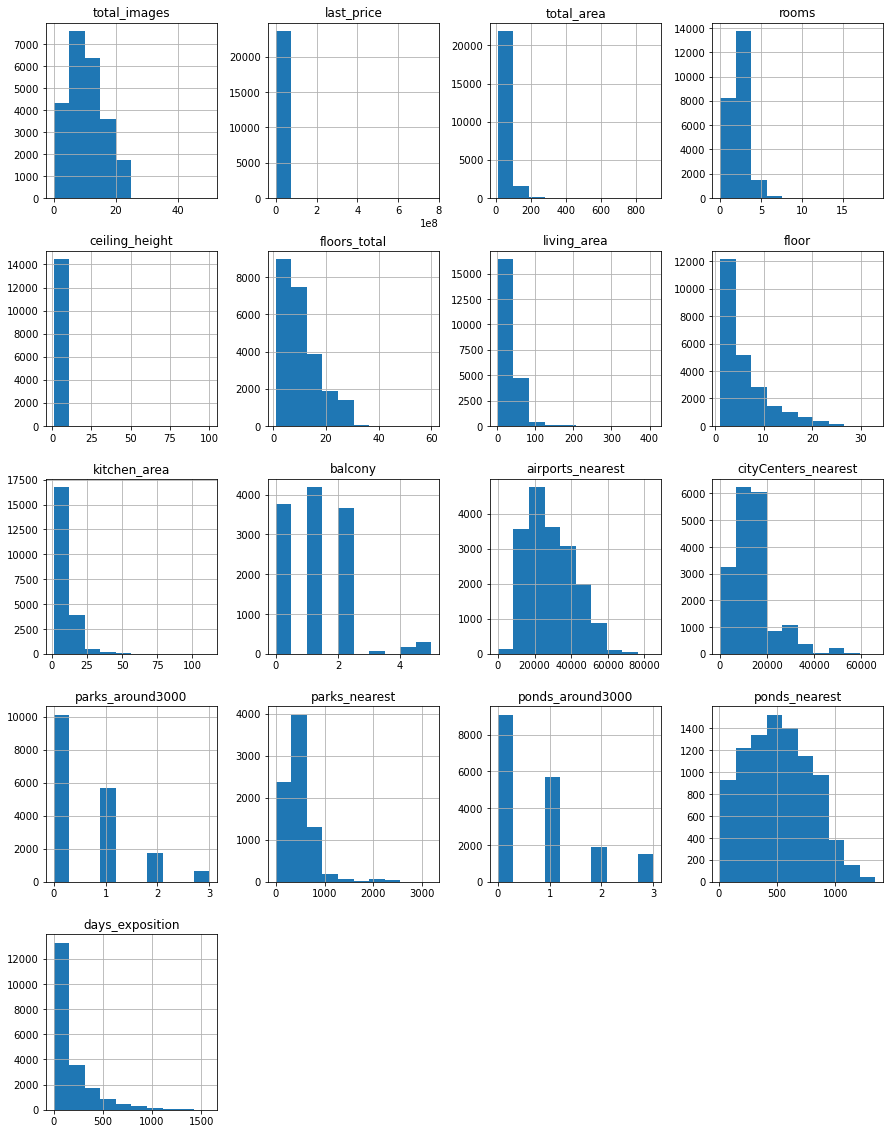

In [4]:
data.hist(figsize=(15, 20))

## Предобработка данных

In [5]:
data.columns #проверили название столбцов

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [6]:
data.describe() #Сгенерировали описательную стратистику по каждому столбцу

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [7]:
data.isnull().sum() #Посмотрели количество пропущенный значений 

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

### Вывод

- Cтолбцы 
    - Необходимо привести названия следующих столбцов: `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000` к змеиному виду.
    - Необходимо привести названия столбцов с булевыми значениями к виду `is_...`.

- Типы данных
    - Заменим дату публикации `first_day_exposition` на Datatime.
    - Количество `floors_total`, `balcony` заменим на int64, так как количество этажей, балконов и не может быть дробным.
    - Поменяем `is_apartment` на bool, согласно её предназначению.
    - Изменим типы данных для `parks_around3000`, `ponds_around3000` на int64
- Изменим порядок столбцов в таблице для большего удобства восприятия

- Неоднозначные пропуски значений
    - Пустые значения в `ponds_around3000` и `ponds_nearest` связаны с отсутствием водоемов?
    - Пустые значения в `parks_around3000` и `parks_nearest` связаны с отсутствием парков?
    - Пустое значение в `days_exposition` означает, что объявление еще на публикации?
    - Пустое значение в `balcony` скорее означает отсуствие балкона?
    - Пустое значение в `is_apartment` означает, что объект недвижимости - не апаратаменты?



In [8]:
#Переименуем столбцы таблицы:

# first_day_exposition -> date_of_publication
# rooms -> rooms_count
# floors_total -> total_floors
# studio -> is_studio
# open_plan -> is_open_plan
# balcony -> balcony_count
# airports_nearest -> nearest_airport_distance
# cityCenters_nearest -> nearest_city_center_distance
# parks_around3000 -> parks_in_3km_count
# parks_nearest -> nearest_park_distance
# ponds_around3000 -> ponds_in_3km_count
# ponds_nearest -> nearest_pond_distance
# days_exposition -> days_before_remove

(data.set_axis(
    ['total_images', 'last_price', 'total_area', 'date_of_publication',
     'rooms_count', 'ceiling_height', 'total_floors', 'living_area', 'floor',
     'is_apartment', 'is_studio', 'is_open_plan', 'kitchen_area', 'balcony_count',
     'locality_name', 'nearest_airport_distance', 'nearest_city_center_distance',
     'parks_in_3km_count', 'nearest_park_distance', 'ponds_in_3km_count',
     'nearest_pond_distance', 'days_before_remove'], axis = 'columns', inplace = True)
)

# поменяем порядок столбцов, таким образом, чтобы данные располагались по группам 

new_columns_order = (['balcony_count', 'rooms_count', # количество комнат
     'living_area', 'kitchen_area', 'total_area', 'ceiling_height', # площади и высота потолком
     'floor', 'total_floors', # этажи
    'locality_name', 'nearest_city_center_distance', 'nearest_airport_distance', # населенный пункт и расстояние
     'parks_in_3km_count', 'nearest_park_distance', 'ponds_in_3km_count', 'nearest_pond_distance', # парки и водоемы
     'total_images', 'last_price', # дополнительная информация
     'date_of_publication', 'days_before_remove', # даты и время жизни объявления
     'is_apartment', 'is_studio', 'is_open_plan'])

data = data[new_columns_order]


data.head()

,balcony_count,rooms_count,living_area,kitchen_area,total_area,ceiling_height,floor,total_floors,locality_name,nearest_city_center_distance,...,nearest_park_distance,ponds_in_3km_count,nearest_pond_distance,total_images,last_price,date_of_publication,days_before_remove,is_apartment,is_studio,is_open_plan
0,NaN,3,51.0,25.0,108.0,2.70,8,16.0,Санкт-Петербург,16028.0,...,482.0,2.0,755.0,20,13000000.0,2019-03-07T00:00:00,NaN,NaN,False,False
1,2.0,1,18.6,11.0,40.4,NaN,1,11.0,посёлок Шушары,18603.0,...,NaN,0.0,NaN,7,3350000.0,2018-12-04T00:00:00,81.0,NaN,False,False
2,0.0,2,34.3,8.3,56.0,NaN,4,5.0,Санкт-Петербург,13933.0,...,90.0,2.0,574.0,10,5196000.0,2015-08-20T00:00:00,558.0,NaN,False,False
3,0.0,3,NaN,NaN,159.0,NaN,9,14.0,Санкт-Петербург,6800.0,...,84.0,3.0,234.0,0,64900000.0,2015-07-24T00:00:00,424.0,NaN,False,False
4,NaN,2,32.0,41.0,100.0,3.03,13,14.0,Санкт-Петербург,8098.0,...,112.0,1.0,48.0,2,10000000.0,2018-06-19T00:00:00,121.0,NaN,False,False


*Прежде чем изменить типы данных, указанные в выводе, необходимо разобраться с пропусками значений в соответсвуюших колонках.*

In [9]:
data.isnull().sum()

balcony_count                   11519
rooms_count                         0
living_area                      1903
kitchen_area                     2278
total_area                          0
ceiling_height                   9195
floor                               0
total_floors                       86
locality_name                      49
nearest_city_center_distance     5519
nearest_airport_distance         5542
parks_in_3km_count               5518
nearest_park_distance           15620
ponds_in_3km_count               5518
nearest_pond_distance           14589
total_images                        0
last_price                          0
date_of_publication                 0
days_before_remove               3181
is_apartment                    20924
is_studio                           0
is_open_plan                        0
dtype: int64

In [10]:
#Вероятней всего пропуски в столбце `balcony_count` связаны с непосредственным отсутствие балкона, смело заменяем пропуски нулями.
data['balcony_count'] = data['balcony_count'].fillna(0)

#Дальше по списку идут пропуски в столбцах `living_area` и `kitchen_area` c ними мы разберемся позже
#Пропуски в столбце `ceiling_height` заполним медианным значением
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

#Дальше по списку идут два столбца `total_floors` `locality_name`, пропуски в которых восстановлению не подлежат, удалим их :)
data.dropna(subset=['locality_name', 'total_floors'], inplace=True)

#Следом идут два столбца `nearest_city_center_distance`, `nearest_airport_distance` пропусков в которых большое количество, но восстановлению без дополнительной информации они не подлежат. 
#Расстояние до центра города варьируется в соответствии с размерами самого города аналогично ситуация обстоит и с расстоянием до аэропорта.

#Рассмотрим ситуацию с парками и прудами рядом с обьектами недвижимости. 
#Ситуация складывается следующая, если в колонке `parks_in_3km_count` не указано значение, то парк логичным образом находится за пределами круга в 3 км.
#Аналогичная ситуация наблюдается и с прудами, если колонка `ponds_in_3km_count` пустая, значит пруд за пределами 3 км. 
#Заполним пустые значения количества `parks_in_3km_count` `ponds_in_3km_count` нулями. 
data['parks_in_3km_count'] = data['parks_in_3km_count'].fillna(0)
data['ponds_in_3km_count'] = data['ponds_in_3km_count'].fillna(0)
#Расстояние положим равным 4 км (можно выбрать любое другое, не принципиально)
data['nearest_park_distance'] = data['nearest_park_distance'].fillna(4000)
data['nearest_pond_distance'] = data['nearest_pond_distance'].fillna(4000)

#Столбец `days_before_remove` не требует заполнения пропусков, потому что обьявление на момент составления датасета вероятно не было снято с продажи.              

#Последний столбец который мы заполним `is_apartment` поместив в него значение True, так как весь датасет про недвижимость, а именно про квартиры.
data['is_apartment'] = data['is_apartment'].fillna(True)

pd.set_option('display.max_columns', len(data.columns) + 10) #Установим режим отображения максимального количества колонок, 
data

,balcony_count,rooms_count,living_area,kitchen_area,total_area,ceiling_height,floor,total_floors,locality_name,nearest_city_center_distance,nearest_airport_distance,parks_in_3km_count,nearest_park_distance,ponds_in_3km_count,nearest_pond_distance,total_images,last_price,date_of_publication,days_before_remove,is_apartment,is_studio,is_open_plan
0,0.0,3,51.0,25.00,108.00,2.70,8,16.0,Санкт-Петербург,16028.0,18863.0,1.0,482.0,2.0,755.0,20,13000000.0,2019-03-07T00:00:00,NaN,True,False,False
1,2.0,1,18.6,11.00,40.40,2.65,1,11.0,посёлок Шушары,18603.0,12817.0,0.0,4000.0,0.0,4000.0,7,3350000.0,2018-12-04T00:00:00,81.0,True,False,False
2,0.0,2,34.3,8.30,56.00,2.65,4,5.0,Санкт-Петербург,13933.0,21741.0,1.0,90.0,2.0,574.0,10,5196000.0,2015-08-20T00:00:00,558.0,True,False,False
3,0.0,3,NaN,NaN,159.00,2.65,9,14.0,Санкт-Петербург,6800.0,28098.0,2.0,84.0,3.0,234.0,0,64900000.0,2015-07-24T00:00:00,424.0,True,False,False
4,0.0,2,32.0,41.00,100.00,3.03,13,14.0,Санкт-Петербург,8098.0,31856.0,2.0,112.0,1.0,48.0,2,10000000.0,2018-06-19T00:00:00,121.0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,0.0,3,73.3,13.83,133.81,3.70,3,5.0,Санкт-Петербург,4232.0,24665.0,1.0,796.0,3.0,381.0,9,9700000.0,2017-03-21T00:00:00,NaN,True,False,False
23695,0.0,3,38.0,8.50,59.00,2.65,4,5.0,Тосно,NaN,NaN,0.0,4000.0,0.0,4000.0,14,3100000.0,2018-01-15T00:00:00,45.0,True,False,False
23696,0.0,2,29.7,NaN,56.70,2.65,1,3.0,село Рождествено,NaN,NaN,0.0,4000.0,0.0,4000.0,18,2500000.0,2018-02-11T00:00:00,NaN,True,False,False
23697,2.0,2,NaN,23.30,76.75,3.00,12,17.0,Санкт-Петербург,10364.0,39140.0,2.0,173.0,3.0,196.0,13,11475000.0,2017-03-28T00:00:00,602.0,True,False,False


*Настало время разобраться с двумя столбцами пропущенных значений* `living_area` `kitchen_area` 

In [11]:
la = data['living_area'].sum() #Суммарная жилая площадь
ka = data['kitchen_area'].sum() #Суммарная площадь кухонь
ta = data['total_area'].sum() #Суммарная площадь всей квартиры
ratio_living_total = la/ta
ratio_kitchen_total = ka/ta
print('Отношение living_area к total_area:',ratio_living_total)
print('Отношение kitchen_area к total_area:',ratio_kitchen_total)
print('Нежелая площадь',(ta-la-ka)/ta)

Отношение living_area к total_area: 0.5259695853925763
Отношение kitchen_area к total_area: 0.1585663978452169
Нежелая площадь 0.31546401676220676


Выходит, что в среднем 31% общей площади не попадает в разряд жилой и площади кухни.
При этой 52.6% площади квартиры это жилая зона, на кухню приходится 15.9% общей площади.

Учтем данные расчеты для поиска проипущенный значений в `living_area` `kitchen_area`.

Есть три случая:
- Оба числа в `living_area` и `kitchen_area` пропущены, тут будем заменять данные в пропорциях найденных ранее.
- Пропущено значение в столбце `living_area`, заменим его на 52.6% общей плозади (`total_area`)
- Пропущено значение в столбце `kitchen_area`, заменим его на 15.9% общей плозади (`total_area`)

In [12]:
import math #Библиотека для обработки Nan

def missing_living_area(row):
    if math.isnan(row['living_area']):
        return (round(row['total_area']*ratio_living_total))
    
    return row['living_area']
                
data['living_area'] = data.apply(missing_living_area, axis=1)
                
def missing_kitchen_area(row):
    if math.isnan(row['kitchen_area']):
        return (round(row['total_area']*ratio_kitchen_total))
    
    return row['kitchen_area']
                
data['kitchen_area'] = data.apply(missing_kitchen_area, axis=1)

data

,balcony_count,rooms_count,living_area,kitchen_area,total_area,ceiling_height,floor,total_floors,locality_name,nearest_city_center_distance,nearest_airport_distance,parks_in_3km_count,nearest_park_distance,ponds_in_3km_count,nearest_pond_distance,total_images,last_price,date_of_publication,days_before_remove,is_apartment,is_studio,is_open_plan
0,0.0,3,51.0,25.00,108.00,2.70,8,16.0,Санкт-Петербург,16028.0,18863.0,1.0,482.0,2.0,755.0,20,13000000.0,2019-03-07T00:00:00,NaN,True,False,False
1,2.0,1,18.6,11.00,40.40,2.65,1,11.0,посёлок Шушары,18603.0,12817.0,0.0,4000.0,0.0,4000.0,7,3350000.0,2018-12-04T00:00:00,81.0,True,False,False
2,0.0,2,34.3,8.30,56.00,2.65,4,5.0,Санкт-Петербург,13933.0,21741.0,1.0,90.0,2.0,574.0,10,5196000.0,2015-08-20T00:00:00,558.0,True,False,False
3,0.0,3,84.0,25.00,159.00,2.65,9,14.0,Санкт-Петербург,6800.0,28098.0,2.0,84.0,3.0,234.0,0,64900000.0,2015-07-24T00:00:00,424.0,True,False,False
4,0.0,2,32.0,41.00,100.00,3.03,13,14.0,Санкт-Петербург,8098.0,31856.0,2.0,112.0,1.0,48.0,2,10000000.0,2018-06-19T00:00:00,121.0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,0.0,3,73.3,13.83,133.81,3.70,3,5.0,Санкт-Петербург,4232.0,24665.0,1.0,796.0,3.0,381.0,9,9700000.0,2017-03-21T00:00:00,NaN,True,False,False
23695,0.0,3,38.0,8.50,59.00,2.65,4,5.0,Тосно,NaN,NaN,0.0,4000.0,0.0,4000.0,14,3100000.0,2018-01-15T00:00:00,45.0,True,False,False
23696,0.0,2,29.7,9.00,56.70,2.65,1,3.0,село Рождествено,NaN,NaN,0.0,4000.0,0.0,4000.0,18,2500000.0,2018-02-11T00:00:00,NaN,True,False,False
23697,2.0,2,40.0,23.30,76.75,3.00,12,17.0,Санкт-Петербург,10364.0,39140.0,2.0,173.0,3.0,196.0,13,11475000.0,2017-03-28T00:00:00,602.0,True,False,False


In [13]:
data.isnull().sum()

balcony_count                      0
rooms_count                        0
living_area                        0
kitchen_area                       0
total_area                         0
ceiling_height                     0
floor                              0
total_floors                       0
locality_name                      0
nearest_city_center_distance    5501
nearest_airport_distance        5524
parks_in_3km_count                 0
nearest_park_distance              0
ponds_in_3km_count                 0
nearest_pond_distance              0
total_images                       0
last_price                         0
date_of_publication                0
days_before_remove              3171
is_apartment                       0
is_studio                          0
is_open_plan                       0
dtype: int64

**Все возможные пропуски были заполнены, можем перейти к изменению типов данных**

## Изменение типов данных

In [14]:
data['last_price'] = data['last_price'].astype('int64')

data['balcony_count'] = data['balcony_count'].astype('int64')

data['total_floors'] = data['total_floors'].astype('int64')

data['parks_in_3km_count'] = data['parks_in_3km_count'].astype('int64')
data['ponds_in_3km_count'] = data['ponds_in_3km_count'].astype('int64')

# Приведем даты к datetime
data['date_of_publication'] = pd.to_datetime(data['date_of_publication'], format='%Y-%m-%dT%H:%M:%S')

#Проверим ещё раз типы данных
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   balcony_count                 23565 non-null  int64         
 1   rooms_count                   23565 non-null  int64         
 2   living_area                   23565 non-null  float64       
 3   kitchen_area                  23565 non-null  float64       
 4   total_area                    23565 non-null  float64       
 5   ceiling_height                23565 non-null  float64       
 6   floor                         23565 non-null  int64         
 7   total_floors                  23565 non-null  int64         
 8   locality_name                 23565 non-null  object        
 9   nearest_city_center_distance  18064 non-null  float64       
 10  nearest_airport_distance      18041 non-null  float64       
 11  parks_in_3km_count          

## Обработка дубликатов

In [15]:
data.duplicated().sum()

0

*Явных дубликатов функция не выявила*

In [16]:
data['locality_name'].value_counts() #Посмотрим какие названия встречаются

Санкт-Петербург                    15651
посёлок Мурино                       520
посёлок Шушары                       439
Всеволожск                           398
Пушкин                               369
                                   ...  
поселок Каложицы                       1
посёлок Платформа 69-й километр        1
поселок Почап                          1
поселок Гончарово                      1
посёлок Дзержинского                   1
Name: locality_name, Length: 364, dtype: int64

In [17]:
print(len(data['locality_name'].unique())) #Первоначально у нас 364 уникальных названия, можно предпологать, что среди них есть повторяюшиеся, записанные в разных конструкциях.

364


In [18]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [19]:
data['locality_name'] = data['locality_name'].str.lower() #Приведем все названия к нижнему регистру

In [20]:
data['locality_name'] = data['locality_name'].str.split().str[-1] #Оставим последнее слово в каждом названии, исключив тем самым неявные дубликаты разного написания одного места
data

,balcony_count,rooms_count,living_area,kitchen_area,total_area,ceiling_height,floor,total_floors,locality_name,nearest_city_center_distance,nearest_airport_distance,parks_in_3km_count,nearest_park_distance,ponds_in_3km_count,nearest_pond_distance,total_images,last_price,date_of_publication,days_before_remove,is_apartment,is_studio,is_open_plan
0,0,3,51.0,25.00,108.00,2.70,8,16,санкт-петербург,16028.0,18863.0,1,482.0,2,755.0,20,13000000,2019-03-07,NaN,True,False,False
1,2,1,18.6,11.00,40.40,2.65,1,11,шушары,18603.0,12817.0,0,4000.0,0,4000.0,7,3350000,2018-12-04,81.0,True,False,False
2,0,2,34.3,8.30,56.00,2.65,4,5,санкт-петербург,13933.0,21741.0,1,90.0,2,574.0,10,5196000,2015-08-20,558.0,True,False,False
3,0,3,84.0,25.00,159.00,2.65,9,14,санкт-петербург,6800.0,28098.0,2,84.0,3,234.0,0,64900000,2015-07-24,424.0,True,False,False
4,0,2,32.0,41.00,100.00,3.03,13,14,санкт-петербург,8098.0,31856.0,2,112.0,1,48.0,2,10000000,2018-06-19,121.0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,0,3,73.3,13.83,133.81,3.70,3,5,санкт-петербург,4232.0,24665.0,1,796.0,3,381.0,9,9700000,2017-03-21,NaN,True,False,False
23695,0,3,38.0,8.50,59.00,2.65,4,5,тосно,NaN,NaN,0,4000.0,0,4000.0,14,3100000,2018-01-15,45.0,True,False,False
23696,0,2,29.7,9.00,56.70,2.65,1,3,рождествено,NaN,NaN,0,4000.0,0,4000.0,18,2500000,2018-02-11,NaN,True,False,False
23697,2,2,40.0,23.30,76.75,3.00,12,17,санкт-петербург,10364.0,39140.0,2,173.0,3,196.0,13,11475000,2017-03-28,602.0,True,False,False


In [21]:
data['locality_name'].value_counts()

санкт-петербург    15651
мурино               586
кудрово              470
шушары               439
всеволожск           398
                   ...  
белоостров             1
пельгора               1
каложицы               1
пикколово              1
дзержинского           1
Name: locality_name, Length: 294, dtype: int64

In [22]:
data['locality_name'].sort_values().unique()

array(['агалатово', 'александровская', 'алексеевка', 'аннино', 'аро',
       'барышево', 'батово', 'бегуницы', 'белогорка', 'белоостров',
       'бокситогорск', 'бор', 'бугры', 'будогощь', 'ваганово', 'важины',
       'вартемяги', 'верево', 'вещево', 'виллози', 'вознесенье',
       'возрождение', 'войсковицы', 'войскорово', 'володарское',
       'волосово', 'волхов', 'вруда', 'всеволожск', 'выборг', 'вырица',
       'выскатка', 'высокоключевой', 'высоцк', 'гаврилово', 'гарболово',
       'гатчина', 'гладкое', 'глажево', 'глебычево', 'глинка',
       'гончарово', 'горбунки', 'горка', 'гостилицы', 'грива', 'громово',
       'девяткино', 'дзержинского', 'долина', 'дружноселье', 'дубровка',
       'елизаветино', 'ефимовский', 'жилгородок', 'жилпосёлок', 'житково',
       'заводской', 'заклинье', 'заневка', 'запорожское', 'зеленогорск',
       'зимитицы', 'ивангород', 'ижора', 'извара', 'ильичёво', 'иссад',
       'калитино', 'каложицы', 'кальтино', 'каменногорск', 'камышовка',
       'кара

In [23]:
print(len(data['locality_name'].unique())) 

294


### Промежуточный вывод

Предположение подтвержилось, после проделанных операций количество уникальных названий дейстивительно стало меньше. 

Ручной анализ выявил дубликаты:
- 'русско', 'русско-высоцкое'
- 'кингисепп', 'кингисеппский'
- 'коммунар', 'коммунары'

Неопознанный жилой пункт:
- 'километр'
- 'село'

In [24]:
strange_data = data.query('locality_name in ["русско", "русско-высоцкое"]')

strange_data #Судя по всему в данном случае просто пропустили приставку -высоцкое и подразумевается именно этот населенный пункт
data.loc[data['locality_name'] == 'русско', 'locality_name'] = 'русско-высоцкое'

In [25]:
strange_data = data.query('locality_name in ["русско", "русско-высоцкое"]')
strange_data #Успешно устранили данный дубликат использовав логическую индексацию с условием

,balcony_count,rooms_count,living_area,kitchen_area,total_area,ceiling_height,floor,total_floors,locality_name,nearest_city_center_distance,nearest_airport_distance,parks_in_3km_count,nearest_park_distance,ponds_in_3km_count,nearest_pond_distance,total_images,last_price,date_of_publication,days_before_remove,is_apartment,is_studio,is_open_plan
4483,0,1,20.1,14.3,46.5,2.55,8,10,русско-высоцкое,NaN,NaN,0,4000.0,0,4000.0,12,2300000,2017-10-20,414.0,True,False,False
6816,0,1,18.9,13.3,46.1,2.65,2,10,русско-высоцкое,NaN,NaN,0,4000.0,0,4000.0,11,2400000,2016-02-18,421.0,True,False,False
8810,0,3,37.9,7.1,58.8,2.55,1,5,русско-высоцкое,NaN,NaN,0,4000.0,0,4000.0,11,3000000,2017-11-30,504.0,True,False,False
9460,0,2,30.2,7.2,45.0,2.60,1,5,русско-высоцкое,NaN,NaN,0,4000.0,0,4000.0,1,2950000,2017-11-22,6.0,True,False,False
13435,2,1,18.7,13.0,48.4,2.65,6,10,русско-высоцкое,NaN,NaN,0,4000.0,0,4000.0,9,2400000,2017-11-17,67.0,True,False,False
18739,0,2,22.0,7.0,42.0,2.65,4,5,русско-высоцкое,NaN,NaN,0,4000.0,0,4000.0,9,2250000,2017-12-03,45.0,True,False,False
21082,0,2,28.6,7.4,48.0,2.65,2,5,русско-высоцкое,NaN,NaN,0,4000.0,0,4000.0,12,2300000,2018-03-04,271.0,True,False,False
21252,0,2,31.7,8.4,58.6,2.60,4,5,русско-высоцкое,NaN,NaN,0,4000.0,0,4000.0,16,3100000,2016-09-07,778.0,True,False,False
21853,0,1,17.0,5.0,32.0,2.65,5,5,русско-высоцкое,NaN,NaN,0,4000.0,0,4000.0,7,1700000,2018-03-28,44.0,True,False,False
22417,2,1,19.0,14.0,49.0,2.60,9,10,русско-высоцкое,NaN,NaN,0,4000.0,0,4000.0,10,3500000,2019-04-26,NaN,True,False,False


In [26]:
strange_data = data.query('locality_name in ["кингисеппский"]')
strange_data #В данной ситуации у нас всего два обьекта недвижимости из некого `кингисеппский`, заменим его на `кингисепп` с большим количеством объектов недвижимости

,balcony_count,rooms_count,living_area,kitchen_area,total_area,ceiling_height,floor,total_floors,locality_name,nearest_city_center_distance,nearest_airport_distance,parks_in_3km_count,nearest_park_distance,ponds_in_3km_count,nearest_pond_distance,total_images,last_price,date_of_publication,days_before_remove,is_apartment,is_studio,is_open_plan
9332,0,3,33.0,6.0,47.0,2.65,4,5,кингисеппский,NaN,NaN,0,4000.0,0,4000.0,3,1400000,2016-06-21,49.0,True,False,False
9664,2,3,39.0,8.5,74.0,2.50,4,5,кингисеппский,NaN,NaN,0,4000.0,0,4000.0,12,2400000,2018-11-05,NaN,True,False,False


In [27]:
data.loc[data['locality_name'] == 'кингисеппский', 'locality_name'] = 'кингисепп'

In [28]:
strange_data = data.query('locality_name in ["коммунары"]') #Аналогчиная ситуация, заменим этот выброс на его старшего брата `коммунар`
strange_data

,balcony_count,rooms_count,living_area,kitchen_area,total_area,ceiling_height,floor,total_floors,locality_name,nearest_city_center_distance,nearest_airport_distance,parks_in_3km_count,nearest_park_distance,ponds_in_3km_count,nearest_pond_distance,total_images,last_price,date_of_publication,days_before_remove,is_apartment,is_studio,is_open_plan
10701,2,2,30.4,8.5,53.7,2.55,1,4,коммунары,NaN,NaN,0,4000.0,0,4000.0,5,1350000,2018-03-26,318.0,True,False,False


In [29]:
data.loc[data['locality_name'] == 'коммунары', 'locality_name'] = 'коммунар'

In [30]:
strange_data = data.query('locality_name in ["километр"]') #Бог его знает откуда в наших данных населенный пункт с названием 'километр', удалим бедолагу
strange_data

,balcony_count,rooms_count,living_area,kitchen_area,total_area,ceiling_height,floor,total_floors,locality_name,nearest_city_center_distance,nearest_airport_distance,parks_in_3km_count,nearest_park_distance,ponds_in_3km_count,nearest_pond_distance,total_images,last_price,date_of_publication,days_before_remove,is_apartment,is_studio,is_open_plan
7646,0,2,29.8,8.3,52.7,2.55,5,5,километр,NaN,NaN,0,4000.0,0,4000.0,15,1350000,2018-10-25,18.0,True,False,False


In [31]:
data = data.drop(labels = [7646], axis = 0).reset_index(drop=True)

In [32]:
strange_data = data.query('locality_name in ["километр"]') #Ура, справились :)
strange_data

,balcony_count,rooms_count,living_area,kitchen_area,total_area,ceiling_height,floor,total_floors,locality_name,nearest_city_center_distance,nearest_airport_distance,parks_in_3km_count,nearest_park_distance,ponds_in_3km_count,nearest_pond_distance,total_images,last_price,date_of_publication,days_before_remove,is_apartment,is_studio,is_open_plan


In [33]:
strange_data = data.query('locality_name in ["село"]') #Полагаю это малоизвестное село под названием село, пусть будет так
strange_data

,balcony_count,rooms_count,living_area,kitchen_area,total_area,ceiling_height,floor,total_floors,locality_name,nearest_city_center_distance,nearest_airport_distance,parks_in_3km_count,nearest_park_distance,ponds_in_3km_count,nearest_pond_distance,total_images,last_price,date_of_publication,days_before_remove,is_apartment,is_studio,is_open_plan
182,0,3,44.1,6.0,60.0,2.50,1,5,село,29514.0,26090.0,0,4000.0,0,4000.0,16,3400000,2017-10-10,98.0,True,False,False
247,1,3,44.9,10.5,70.5,2.65,9,9,село,29018.0,25594.0,0,4000.0,0,4000.0,15,5000000,2018-01-23,219.0,True,False,False
306,0,3,51.8,9.6,83.9,2.60,2,5,село,30670.0,27245.0,0,4000.0,0,4000.0,35,5700000,2018-02-01,47.0,True,False,False
361,2,4,53.0,16.5,101.0,2.60,7,8,село,30300.0,26876.0,0,4000.0,0,4000.0,10,7100000,2019-04-08,NaN,False,False,False
623,0,1,17.0,5.0,33.0,2.65,3,5,село,31253.0,27828.0,1,587.0,0,4000.0,9,1990000,2017-05-18,5.0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23024,0,3,44.0,8.0,65.0,2.65,1,5,село,31104.0,27679.0,0,4000.0,0,4000.0,0,4100000,2016-06-08,45.0,True,False,False
23051,0,3,45.0,10.5,71.0,2.60,3,9,село,28999.0,25575.0,0,4000.0,0,4000.0,16,4750000,2017-04-29,478.0,True,False,False
23235,0,1,17.5,5.5,32.0,2.55,4,4,село,28796.0,25371.0,3,443.0,0,4000.0,7,2150000,2017-08-24,185.0,True,False,False
23453,1,2,34.0,12.0,58.0,2.65,7,8,село,30624.0,27199.0,0,4000.0,0,4000.0,14,4350000,2018-02-06,112.0,True,False,False


### Вывод по предобработке данных

- Путем приведения всех названий из столбца `localoty_name` к нижнему регистру и последующим обрезанием нам удалось уменьшить количество уникальных названий с `364` до `294`
- Вручную были обработаны несколько дубликатов, оставшихся в списке имен
- Удалено неизвестное место 'километр', оставшиеся дубликаты переименованы.

## Посчитайте и добавьте в таблицу новые столбцы

In [34]:
# Добавим в таблицу поля, которые понадобятся нам в дальнейшем

# Добавим цену квадратного метра;
data['square_meter_price'] = round(data['last_price'] / data['total_area'], 2)

# Добавим день недели, месяц и год публикации объявления;
data['year_of_publ'] = data['date_of_publication'].dt.year
data['month_of_publ'] = data['date_of_publication'].dt.month
data['day_of_publ'] = data['date_of_publication'].dt.day
data['weekday_of_publ'] = data['date_of_publication'].dt.weekday

# Добавим этаж квартиры; варианты — первый, последний, другой;
def get_floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['total_floors']:
        return 'последний'
    return 'другой'

data['floor_type'] =  data.apply(get_floor_type, axis=1)

# Добавим соотношение жилой и общей площади, а также отношение площади кухни к общей.
data['living_area_part'] = round(data['living_area'] / data['total_area'], 2)
data['kitchen_area_part'] = round(data['kitchen_area'] / data['total_area'], 2)
data['nearest_city_center_distance'] = round(data['nearest_city_center_distance'] / 1000)
# проверим новые поля
data.head(10)

,balcony_count,rooms_count,living_area,kitchen_area,total_area,ceiling_height,floor,total_floors,locality_name,nearest_city_center_distance,nearest_airport_distance,parks_in_3km_count,nearest_park_distance,ponds_in_3km_count,nearest_pond_distance,total_images,last_price,date_of_publication,days_before_remove,is_apartment,is_studio,is_open_plan,square_meter_price,year_of_publ,month_of_publ,day_of_publ,weekday_of_publ,floor_type,living_area_part,kitchen_area_part
0,0,3,51.00,25.00,108.00,2.70,8,16,санкт-петербург,16.0,18863.0,1,482.0,2,755.0,20,13000000,2019-03-07,NaN,True,False,False,120370.37,2019,3,7,3,другой,0.47,0.23
1,2,1,18.60,11.00,40.40,2.65,1,11,шушары,19.0,12817.0,0,4000.0,0,4000.0,7,3350000,2018-12-04,81.0,True,False,False,82920.79,2018,12,4,1,первый,0.46,0.27
2,0,2,34.30,8.30,56.00,2.65,4,5,санкт-петербург,14.0,21741.0,1,90.0,2,574.0,10,5196000,2015-08-20,558.0,True,False,False,92785.71,2015,8,20,3,другой,0.61,0.15
3,0,3,84.00,25.00,159.00,2.65,9,14,санкт-петербург,7.0,28098.0,2,84.0,3,234.0,0,64900000,2015-07-24,424.0,True,False,False,408176.10,2015,7,24,4,другой,0.53,0.16
4,0,2,32.00,41.00,100.00,3.03,13,14,санкт-петербург,8.0,31856.0,2,112.0,1,48.0,2,10000000,2018-06-19,121.0,True,False,False,100000.00,2018,6,19,1,другой,0.32,0.41
5,0,1,14.40,9.10,30.40,2.65,5,12,янино-1,NaN,NaN,0,4000.0,0,4000.0,10,2890000,2018-09-10,55.0,True,False,False,95065.79,2018,9,10,0,другой,0.47,0.30
6,1,1,10.60,14.40,37.30,2.65,6,26,парголово,19.0,52996.0,0,4000.0,0,4000.0,6,3700000,2017-11-02,155.0,True,False,False,99195.71,2017,11,2,3,другой,0.28,0.39
7,2,2,38.00,18.90,71.60,2.65,22,24,санкт-петербург,12.0,23982.0,0,4000.0,0,4000.0,5,7915000,2019-04-18,NaN,True,False,False,110544.69,2019,4,18,3,другой,0.53,0.26
8,0,1,15.43,8.81,33.16,2.65,26,27,мурино,NaN,NaN,0,4000.0,0,4000.0,20,2900000,2018-05-23,189.0,True,False,False,87454.76,2018,5,23,2,другой,0.47,0.27
9,2,3,43.60,6.50,61.00,2.50,7,9,санкт-петербург,15.0,50898.0,0,4000.0,0,4000.0,18,5400000,2017-02-26,289.0,True,False,False,88524.59,2017,2,26,6,другой,0.71,0.11


*Проверим нет ли выбросов среди пропусков в столбце* `days_before_remove`, для этого создадим сводную таблицу.

In [35]:
data_days = data.query('days_before_remove.isna()').pivot_table(index = 'year_of_publ', values = 'balcony_count', aggfunc=['count'])
data_days.columns = ['count']
data_days

,count
year_of_publ,
2014,18
2015,70
2016,67
2017,271
2018,957
2019,1788


<AxesSubplot:xlabel='year_of_publ'>

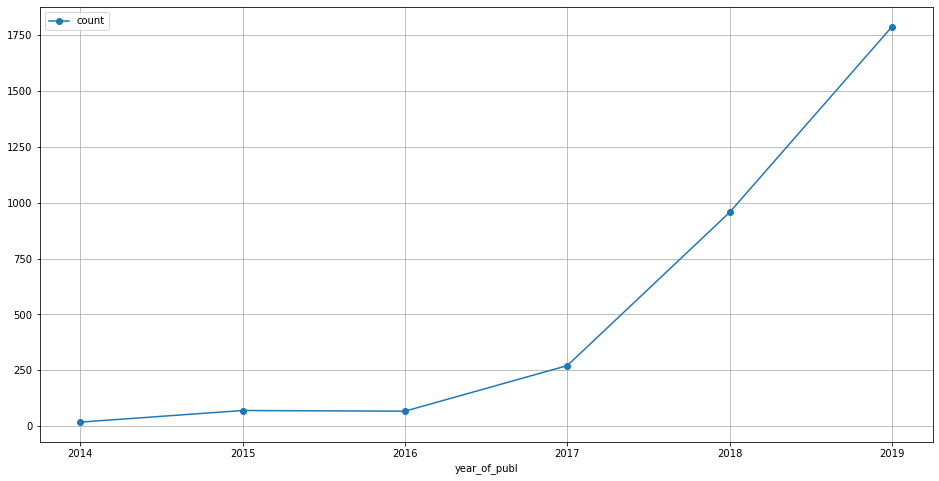

In [36]:
data_days.plot(style ='o-', grid= True, figsize= (16,8), alpha= 1)

In [37]:
data = data.query('(days_before_remove.notna() or year_of_publ not in [2014,2015,2016,2017])')

data['days_before_remove'].isna().sum()

2745

In [38]:
data_days = data.query('days_before_remove.isna()').pivot_table(index = 'year_of_publ', values = 'balcony_count', aggfunc=['count'])
data_days.columns = ['count']
data_days

,count
year_of_publ,
2018,957
2019,1788


### Вывод

- Были добавлены необходимые для дальнейшего анализа столбцы.

- Объявления из 2014-2017 года скорее всего просто забыли удалить с агрегаторов недвижимости и они не являются актуальными. Можно их удалить, потери составят всего 426 строк, но мы будем уверены, что наши данные станут более актуальными и в них не будет вбросов, особенно по части цены квадратного метра (недвижимость с 2014 года стала значительно дороже)

## Исследовательский анализ данных

### I. Поиск и устранение выбросов

In [39]:
data[['kitchen_area', 'living_area', 'total_area']].describe()

,kitchen_area,living_area,total_area
count,23138.000000,23138.000000,23138.000000
mean,10.348668,34.042591,59.786981
std,5.878196,21.755916,34.994830
min,1.300000,2.000000,12.000000
25%,7.000000,18.900000,40.000000
50%,9.000000,30.000000,51.800000
75%,11.800000,42.000000,69.000000
max,112.000000,409.700000,900.000000


*Наблюдаем аномально большие значения в строке* `max` *и высокое стандартное отклонение. Предварительно можно сказать, что есть отклонения, будем посмотреть*

In [40]:
# Две функции для быстрого построения диаграмм размаха и гистограмм
def draw_boxplot(data, ylim_min, ylim_max, title, xlabel, ylabel): 
    fig, ax = plt.subplots()

    ax.boxplot(data)
    ax.grid()
    ax.set_ylim(ylim_min,ylim_max)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    fig.set_figheight(6.5)
    fig.set_figwidth(6.5)
    plt.show()

In [41]:
def draw_hist(data, bins, min_range, max_range, title, xlabel, ylabel): 
    fig, ax = plt.subplots()
    
    ax.hist(data, bins= bins, range=(min_range, max_range))
    ax.grid() 
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    fig.set_figheight(8)
    fig.set_figwidth(16)
    plt.show()

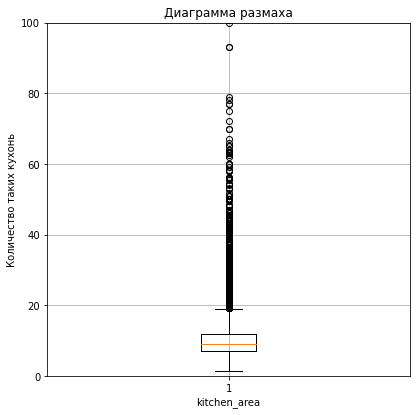

In [42]:
draw_boxplot(data['kitchen_area'],0,100,'Диаграмма размаха','kitchen_area', 'Количество таких кухонь' )

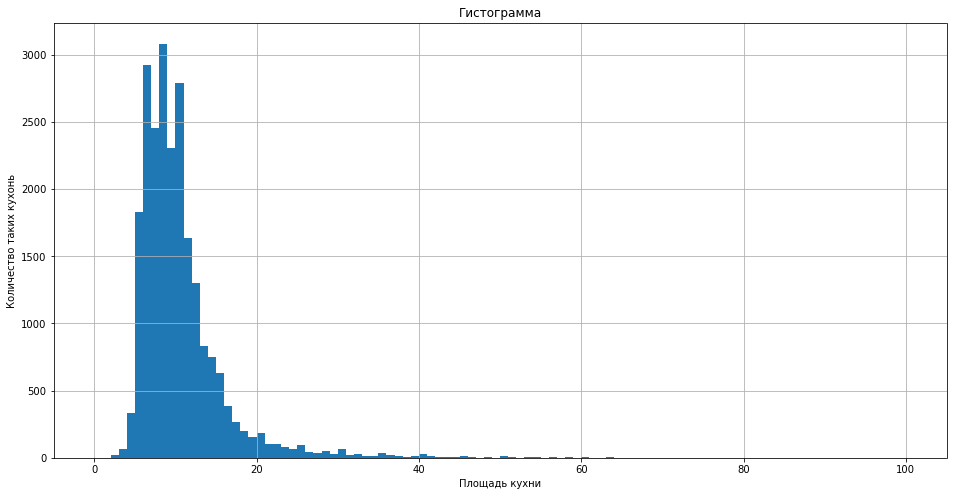

In [43]:
draw_hist(data['kitchen_area'],100,0,100,'Гистограмма','Площадь кухни', 'Количество таких кухонь' )

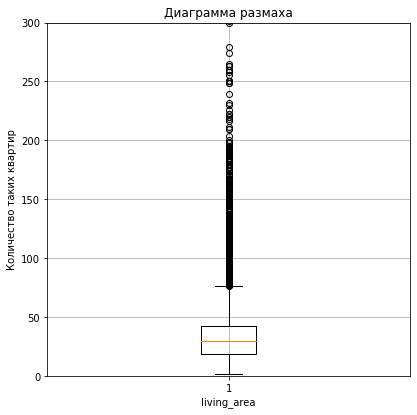

In [44]:
draw_boxplot(data['living_area'],0,300,'Диаграмма размаха', 'living_area', 'Количество таких квартир' )

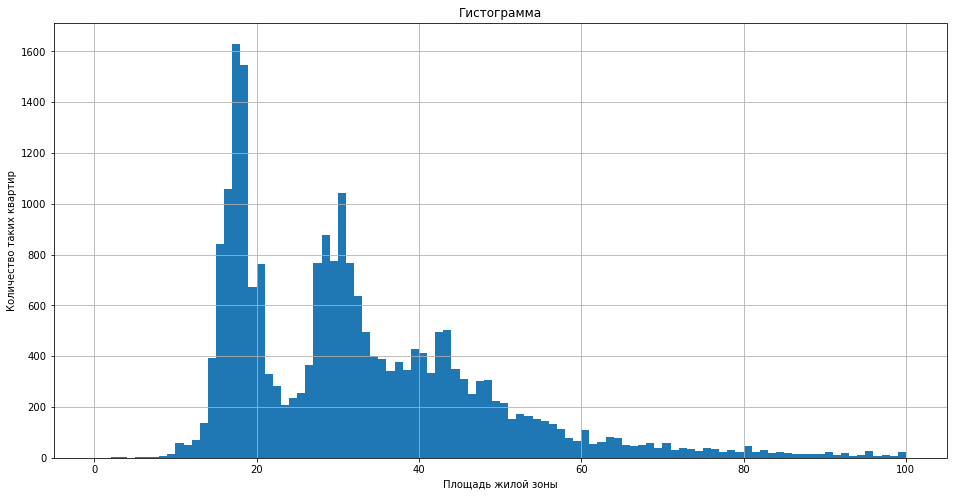

In [45]:
draw_hist(data['living_area'],100,0,100,'Гистограмма','Площадь жилой зоны', 'Количество таких квартир' )

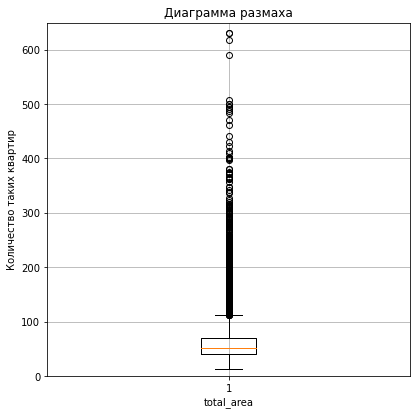

In [46]:
#Явный выбос на 900, ограничим область по оси Оу до 650
draw_boxplot(data['total_area'],0,650,'Диаграмма размаха', 'total_area', 'Количество таких квартир' )

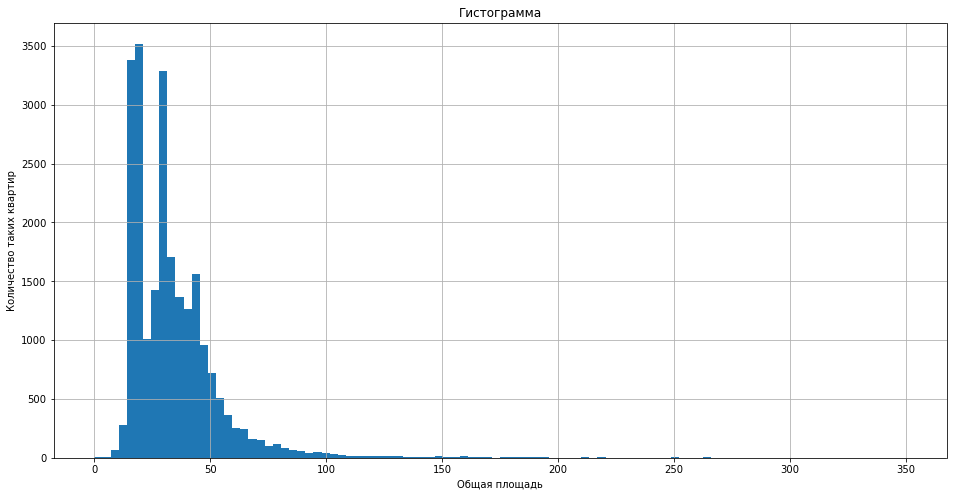

In [47]:
draw_hist(data['living_area'],100,0,350,'Гистограмма','Общая площадь', 'Количество таких квартир' )

*На трех гистограммах явно видны выбросы, ограничим данные, чтобы избавиться от них*

In [48]:
data = data[data['total_area'] < 250]
data = data[data['kitchen_area'] < 25]
data = data[data['living_area'] < 100]

# посмотрим насколько изменилась выборка
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22292 entries, 1 to 23562
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   balcony_count                 22292 non-null  int64         
 1   rooms_count                   22292 non-null  int64         
 2   living_area                   22292 non-null  float64       
 3   kitchen_area                  22292 non-null  float64       
 4   total_area                    22292 non-null  float64       
 5   ceiling_height                22292 non-null  float64       
 6   floor                         22292 non-null  int64         
 7   total_floors                  22292 non-null  int64         
 8   locality_name                 22292 non-null  object        
 9   nearest_city_center_distance  16944 non-null  float64       
 10  nearest_airport_distance      16924 non-null  float64       
 11  parks_in_3km_count          

**Выборка изменилась не сильно, зато мы избавились от явных выбросов по площади**

*Продолжим наши изыскания и рассмотрим самую важную пару значений при покупке квартиры, стоимость и стоимость квадратного метра жилья.*

In [49]:
data[['last_price', 'square_meter_price']].describe()

,last_price,square_meter_price
count,2.229200e+04,22292.000000
mean,5.536601e+06,96424.092328
std,4.346771e+06,39520.579859
min,4.300000e+05,7962.960000
25%,3.393697e+06,75949.370000
50%,4.500000e+06,94216.375000
75%,6.399250e+06,112500.000000
max,1.240000e+08,995983.940000


Ситуация с выбросами в данной категории гораздо лучше, величины порядка 10^-6 и 10^-4 соответственно. Однако выбросы для максимальный значений все также присутствуют, построим ящики с усами и гистограммы для принятия решений

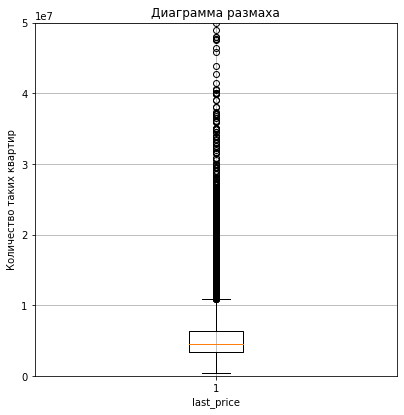

In [50]:
draw_boxplot(data['last_price'],0, 0.5*(10 ** 8),'Диаграмма размаха', 'last_price', 'Количество таких квартир' )

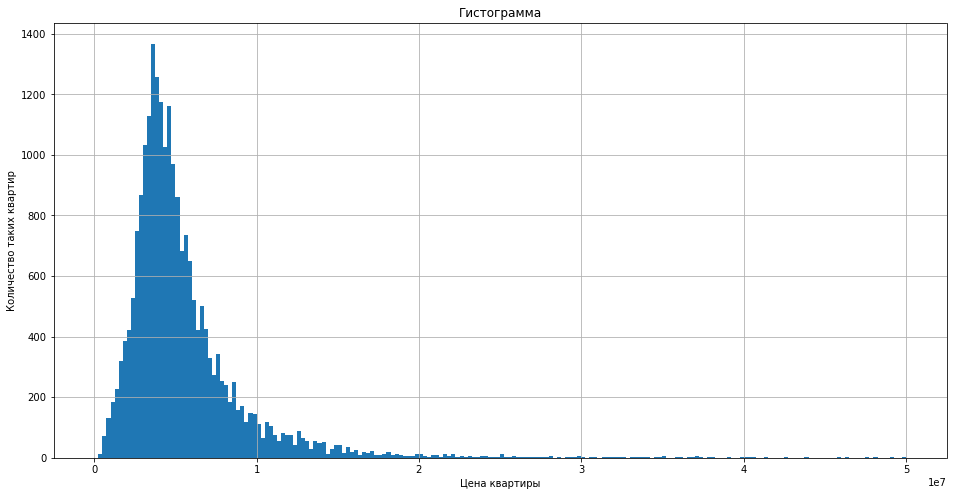

In [51]:
draw_hist(data['last_price'],200,0, 0.5*(10 ** 8),'Гистограмма','Цена квартиры', 'Количество таких квартир' )

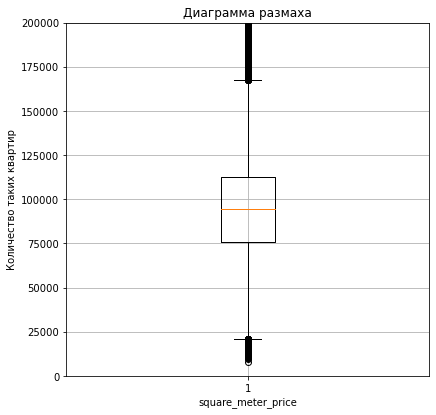

In [52]:
draw_boxplot(data['square_meter_price'],0, 200000,'Диаграмма размаха', 'square_meter_price', 'Количество таких квартир' )

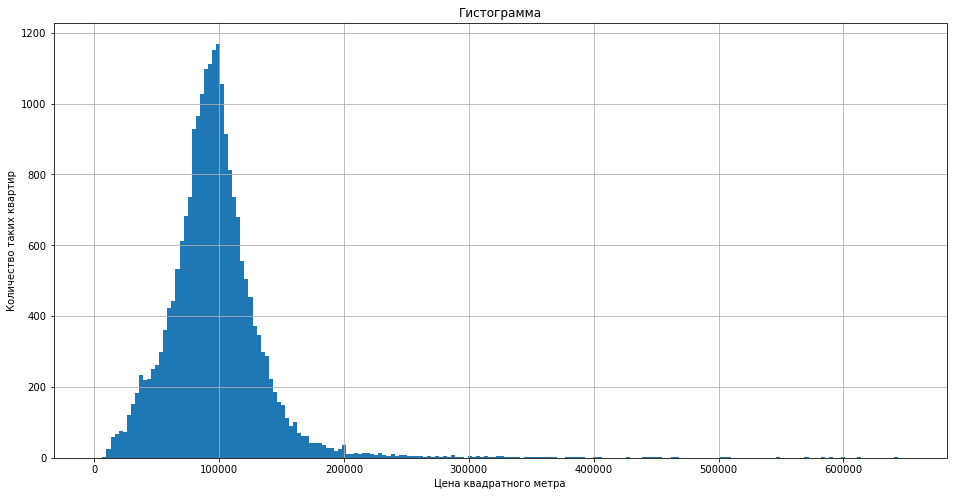

In [53]:
draw_hist(data['square_meter_price'],200,0, 650000,'Гистограмма','Цена квадратного метра', 'Количество таких квартир' )

Выбросы обнаружены, продолжаем очищать наши данные

In [54]:
data = data[data['last_price'] < 1.1*(10 ** 7)]
data = data[(data['square_meter_price'] > 24000) & (data['square_meter_price'] < 160000)]

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20286 entries, 1 to 23561
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   balcony_count                 20286 non-null  int64         
 1   rooms_count                   20286 non-null  int64         
 2   living_area                   20286 non-null  float64       
 3   kitchen_area                  20286 non-null  float64       
 4   total_area                    20286 non-null  float64       
 5   ceiling_height                20286 non-null  float64       
 6   floor                         20286 non-null  int64         
 7   total_floors                  20286 non-null  int64         
 8   locality_name                 20286 non-null  object        
 9   nearest_city_center_distance  15199 non-null  float64       
 10  nearest_airport_distance      15190 non-null  float64       
 11  parks_in_3km_count          

In [55]:
data['rooms_count'].describe()

count    20286.000000
mean         1.916346
std          0.902084
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms_count, dtype: float64

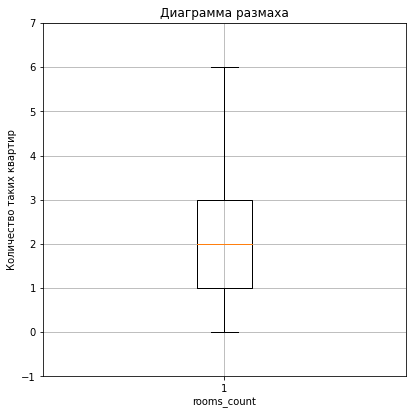

In [56]:
draw_boxplot(data['rooms_count'],-1, 7, 'Диаграмма размаха', 'rooms_count', 'Количество таких квартир' )

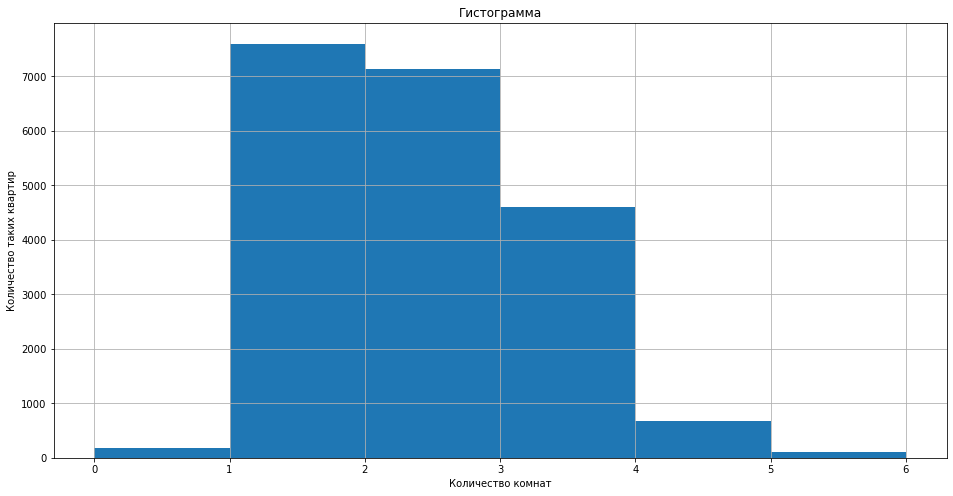

In [57]:
draw_hist(data['rooms_count'],6,0, 6,'Гистограмма','Количество комнат', 'Количество таких квартир' )

Ура, нет выброса по комнатам, идем дальше, проверим как дела обстоят с высотой потолков в продаваемой недвижимости.

In [58]:
data['ceiling_height'].describe() # 32 метра, высоковато даже для Сталинских домов

count    20286.000000
mean         2.691934
std          0.771760
min          1.000000
25%          2.600000
50%          2.650000
75%          2.650000
max         32.000000
Name: ceiling_height, dtype: float64

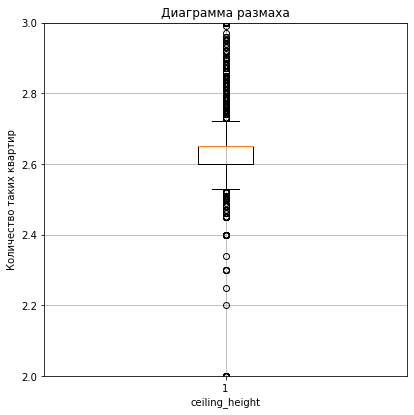

In [59]:
draw_boxplot(data['ceiling_height'],2, 3, 'Диаграмма размаха', 'ceiling_height', 'Количество таких квартир' )

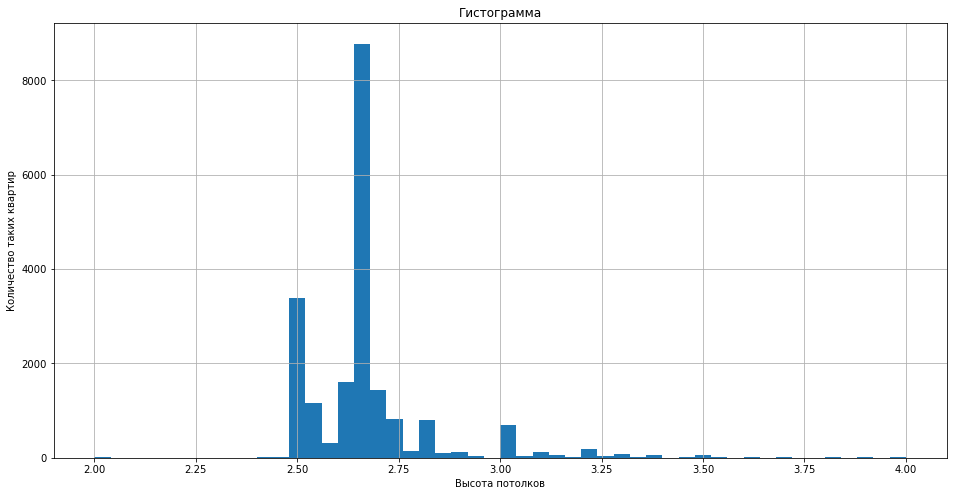

In [60]:
draw_hist(data['ceiling_height'],50,2,4,'Гистограмма','Высота потолков', 'Количество таких квартир' )

In [61]:
data.loc[(data['ceiling_height'] > 4.5) & (data['ceiling_height'] < 20), 'ceiling_height'] = 2.5
data.loc[data['ceiling_height'] >= 20 , 'ceiling_height'] = data['ceiling_height']/10
data = data[(data['ceiling_height'] >= 2.25)]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20271 entries, 1 to 23561
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   balcony_count                 20271 non-null  int64         
 1   rooms_count                   20271 non-null  int64         
 2   living_area                   20271 non-null  float64       
 3   kitchen_area                  20271 non-null  float64       
 4   total_area                    20271 non-null  float64       
 5   ceiling_height                20271 non-null  float64       
 6   floor                         20271 non-null  int64         
 7   total_floors                  20271 non-null  int64         
 8   locality_name                 20271 non-null  object        
 9   nearest_city_center_distance  15194 non-null  float64       
 10  nearest_airport_distance      15185 non-null  float64       
 11  parks_in_3km_count          

In [62]:
data.reset_index(drop= True)
data

,balcony_count,rooms_count,living_area,kitchen_area,total_area,ceiling_height,floor,total_floors,locality_name,nearest_city_center_distance,nearest_airport_distance,parks_in_3km_count,nearest_park_distance,ponds_in_3km_count,nearest_pond_distance,total_images,last_price,date_of_publication,days_before_remove,is_apartment,is_studio,is_open_plan,square_meter_price,year_of_publ,month_of_publ,day_of_publ,weekday_of_publ,floor_type,living_area_part,kitchen_area_part
1,2,1,18.6,11.0,40.4,2.65,1,11,шушары,19.0,12817.0,0,4000.0,0,4000.0,7,3350000,2018-12-04,81.0,True,False,False,82920.79,2018,12,4,1,первый,0.46,0.27
2,0,2,34.3,8.3,56.0,2.65,4,5,санкт-петербург,14.0,21741.0,1,90.0,2,574.0,10,5196000,2015-08-20,558.0,True,False,False,92785.71,2015,8,20,3,другой,0.61,0.15
5,0,1,14.4,9.1,30.4,2.65,5,12,янино-1,NaN,NaN,0,4000.0,0,4000.0,10,2890000,2018-09-10,55.0,True,False,False,95065.79,2018,9,10,0,другой,0.47,0.30
6,1,1,10.6,14.4,37.3,2.65,6,26,парголово,19.0,52996.0,0,4000.0,0,4000.0,6,3700000,2017-11-02,155.0,True,False,False,99195.71,2017,11,2,3,другой,0.28,0.39
7,2,2,38.0,18.9,71.6,2.65,22,24,санкт-петербург,12.0,23982.0,0,4000.0,0,4000.0,5,7915000,2019-04-18,NaN,True,False,False,110544.69,2019,4,18,3,другой,0.53,0.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23556,1,2,40.3,10.6,72.9,2.75,7,25,санкт-петербург,4.0,19424.0,0,4000.0,1,806.0,11,9470000,2016-10-13,519.0,True,False,False,129903.98,2016,10,13,3,другой,0.55,0.15
23557,0,1,17.5,6.0,30.0,2.65,4,5,тихвин,NaN,NaN,0,4000.0,0,4000.0,2,1350000,2017-07-07,413.0,True,False,False,45000.00,2017,7,7,4,другой,0.58,0.20
23558,0,3,40.0,8.0,62.4,2.60,8,9,петергоф,34.0,45602.0,1,352.0,1,675.0,9,4600000,2016-08-05,239.0,True,False,False,73717.95,2016,8,5,4,другой,0.64,0.13
23560,0,3,38.0,8.5,59.0,2.65,4,5,тосно,NaN,NaN,0,4000.0,0,4000.0,14,3100000,2018-01-15,45.0,True,False,False,52542.37,2018,1,15,0,другой,0.64,0.14


#### Промежуточный вывод по поиску и устранению выбросов

- Найдены и устранены выбросы по площадям. Данные аномалии могли привести к грубым ошибкам в дальнейших этапах исследования.
- Тщательно отфильтрованы и отобраны адекватные данные по высоте потолков.
- Количество данных в датасете уменьшилось, но не критически, если возникнут проблемы, вернемся к данному этапу и пересмотрим параметры отбора значений.
- Отсутствуют выбросы по количеству комнат.
- В целом все графики(гистограммы) имеют форму нормально расспределения. Единственное график `living_area` имеет два выброса в районе 20 и 25.

### II. Время продажи квартиры

In [63]:
data_already_closed = data[data['days_before_remove'].notnull()] #Я делаю такой срез в отдельную переменную, потому как ранее решил, что если в столбце days_before_remove стоит Null(NaN), то квартира ещё не продана.

data_already_closed['days_before_remove'].describe() #Уже по обыкновению посмотрим на ситуацию со временем продажии

count    18090.000000
mean       171.844942
std        209.582845
min          1.000000
25%         43.000000
50%         91.000000
75%        218.000000
max       1580.000000
Name: days_before_remove, dtype: float64

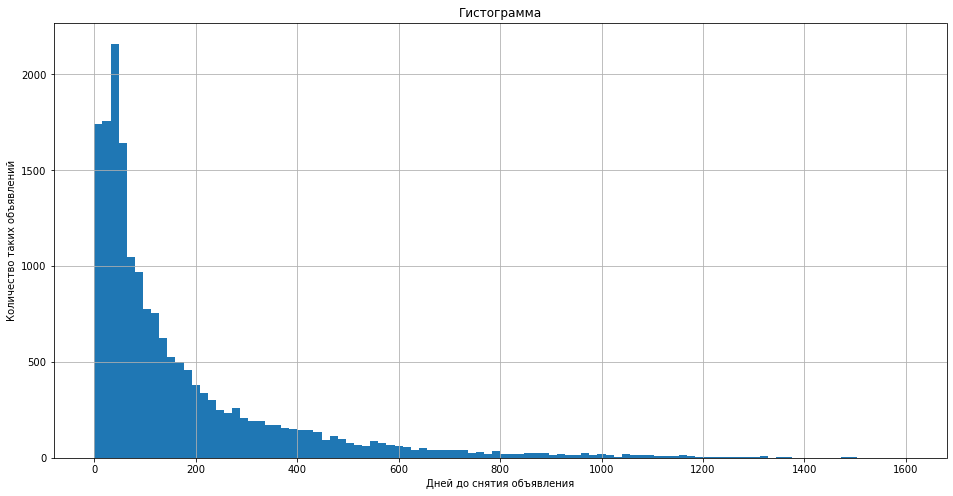

In [64]:
draw_hist(data_already_closed['days_before_remove'],100,0, 1600,'Гистограмма','Дней до снятия объявления', 'Количество таких объявлений' )

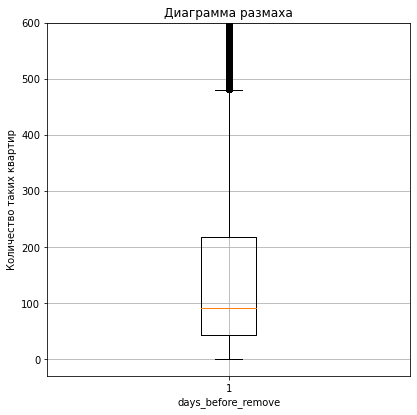

In [65]:
draw_boxplot(data_already_closed['days_before_remove'],-30,600, 'Диаграмма размаха', 'days_before_remove', 'Количество таких квартир' )

#### Вывод по второй части.
- Проведенный анализ гласит, что обычно продажа квартиры занимает от 150 до 200 дней. Аномально быстрой продажей можно назвать продажу за 40 и менее дней, когда анамально долгой продажей судя по нашей выборке считается продажа за 220 и более дней.
- Ящик с усами показал, что наше среднее выше медианы.
- Время продажи описывается Пуассоновским распределением.

### III. Оценка влияния факторов на финальную стоимость объекта

Наш фронт работы в данной части состоит в проверке влиянию следущих факторов на стоимость объекта:

- общей площади
- числа комнат
- этажа (первого или последнего)
- удалённости от центра
- от даты размещения: дня недели, месяца и года.

In [66]:
def draw_plot(data, y, x): #Специальная функция по созданию сводной таблицы и построению графика
    table = data.pivot_table(index= x, values= y, aggfunc='median')
    table.plot(kind='line', figsize= (20,6), style='o', alpha=0.5)

In [67]:
def draw_plot_line(data, y, x): #Специальная функция по созданию сводной таблицы и построению графика
    table = data.pivot_table(index= x, values= y, aggfunc='median')
    table.plot(kind='line', figsize= (20,6), style='o-', alpha=1)

In [68]:
price_rooms_area = data.pivot_table(index=data.index, values=['total_area','rooms_count', 'last_price', 'living_area','kitchen_area'], aggfunc='median') #Сводная таблица для анализа влияния перечня параметров на финальную цену недвижимости
price_rooms_area.corr() #Тот самый коэффициент пирсона

,kitchen_area,last_price,living_area,rooms_count,total_area
kitchen_area,1.000000,0.496399,0.215161,0.113657,0.478954
last_price,0.496399,1.000000,0.610862,0.482841,0.717915
living_area,0.215161,0.610862,1.000000,0.887014,0.917814
rooms_count,0.113657,0.482841,0.887014,1.000000,0.810302
total_area,0.478954,0.717915,0.917814,0.810302,1.000000


<AxesSubplot:>

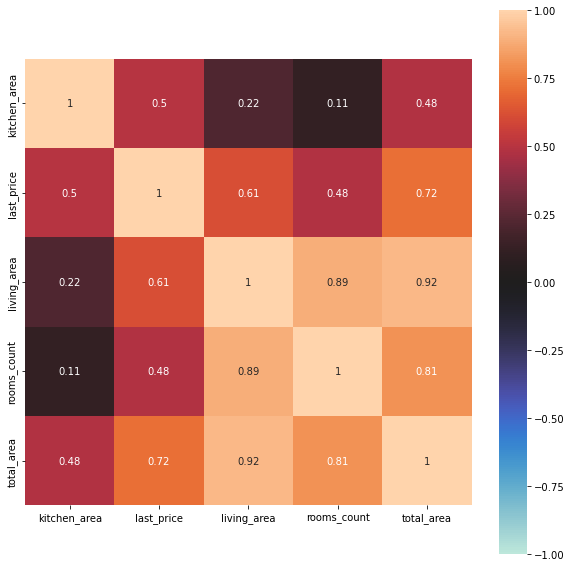

In [69]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(price_rooms_area.corr(), annot=True, square=True, vmin=-1, vmax=1, center=0, ax=ax)

In [70]:
price_rooms_area

,kitchen_area,last_price,living_area,rooms_count,total_area
1,11.0,3350000,18.6,1,40.4
2,8.3,5196000,34.3,2,56.0
5,9.1,2890000,14.4,1,30.4
6,14.4,3700000,10.6,1,37.3
7,18.9,7915000,38.0,2,71.6
...,...,...,...,...,...
23556,10.6,9470000,40.3,2,72.9
23557,6.0,1350000,17.5,1,30.0
23558,8.0,4600000,40.0,3,62.4
23560,8.5,3100000,38.0,3,59.0


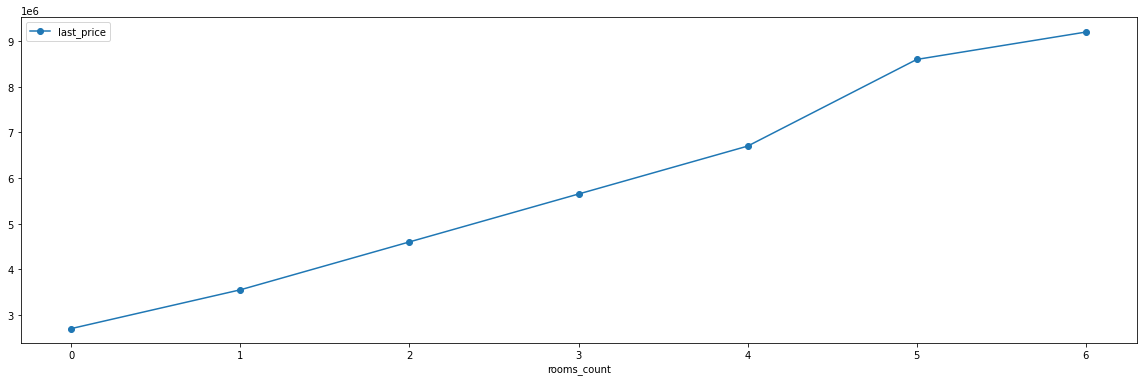

In [71]:
draw_plot_line(data, 'last_price', 'rooms_count')

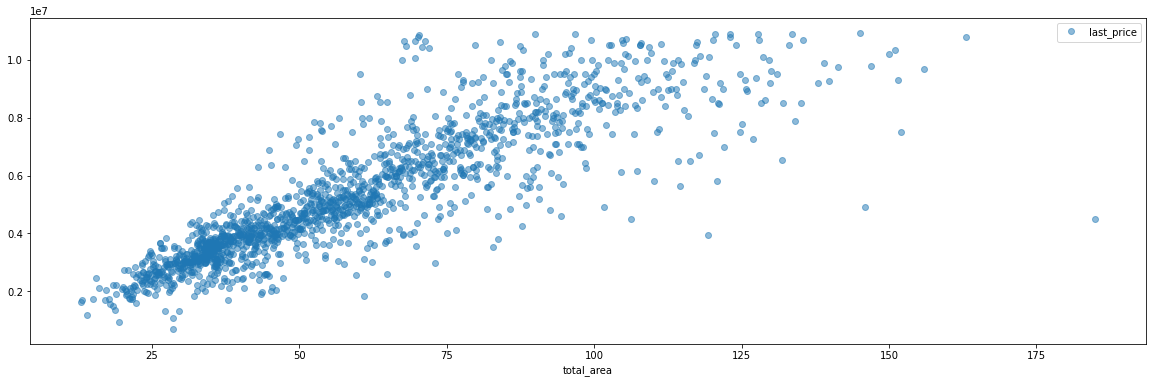

In [72]:
draw_plot(data, 'last_price', 'total_area')

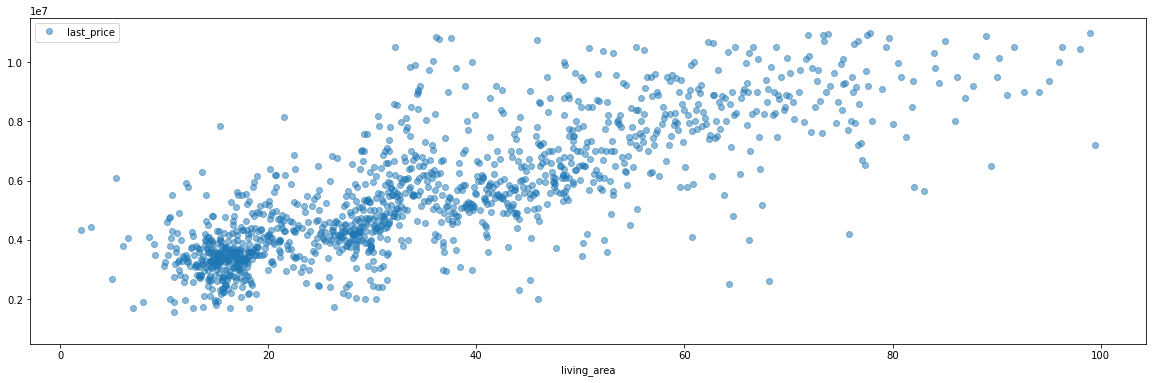

In [73]:
draw_plot(data, 'last_price', 'living_area')

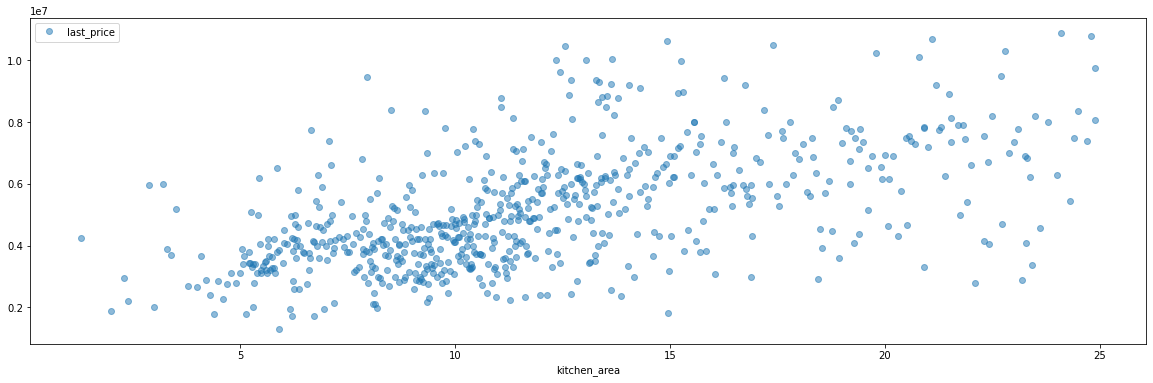

In [74]:
draw_plot(data, 'last_price', 'kitchen_area')

#### Промежуточный вывод

- Финальная стоимость квартиры имеет почти линейную зависимость от количества комнат. Появляется полка в стоимости квартир с пятью и более комнатами.
- Влияние роста общей площади квартиры можно назвать линейным по отношению к её цене, так как большинство точек укладывается в строгую полосу.
- Влияние площади жилых помещений квартиры также близко к линейному, однако всё больше заметен разброс точек по графику, что говорит нам о вариативности предложений по этому кретерию.
- А вот влияние площади кухни на конечную стоимость можно назвать степенным (похоже на функцию $ a*x^{\frac{1}{t}}+b $)

In [75]:
date_floor_center = data.pivot_table(index=data.index, values=['nearest_city_center_distance','floor_type', 'last_price','year_of_publ','month_of_publ','day_of_publ','weekday_of_publ'], aggfunc='median') #Сводная таблица для анализа влияния перечня параметров на финальную цену недвижимости
date_floor_center.corr() #Тот самый коэффициент пирсона

,day_of_publ,last_price,month_of_publ,nearest_city_center_distance,weekday_of_publ,year_of_publ
day_of_publ,1.000000,0.001862,-0.022629,0.012479,-0.050904,-0.021653
last_price,0.001862,1.000000,0.001652,-0.332789,-0.007976,0.006469
month_of_publ,-0.022629,0.001652,1.000000,-0.017507,0.011862,-0.269783
nearest_city_center_distance,0.012479,-0.332789,-0.017507,1.000000,0.005175,0.015320
weekday_of_publ,-0.050904,-0.007976,0.011862,0.005175,1.000000,-0.005603
year_of_publ,-0.021653,0.006469,-0.269783,0.015320,-0.005603,1.000000


<AxesSubplot:>

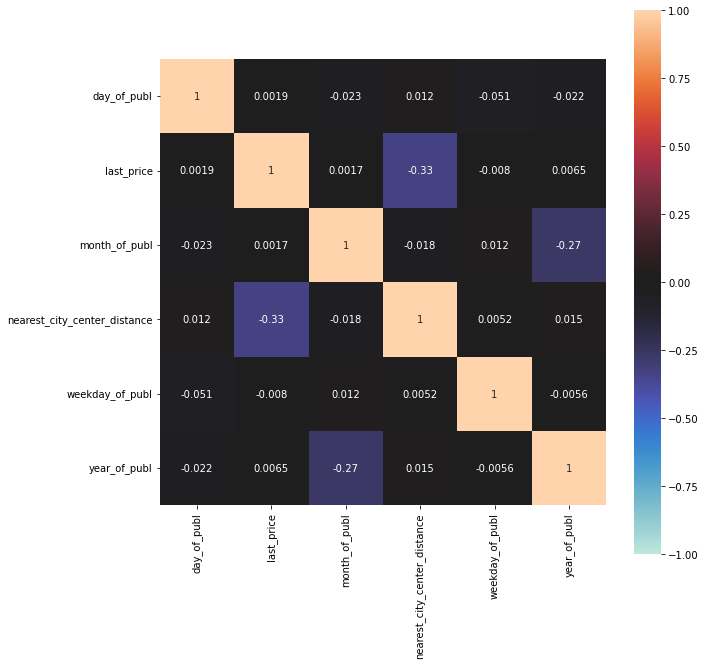

In [76]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(date_floor_center.corr(), annot=True, square=True, vmin=-1, vmax=1, center=0, ax=ax)

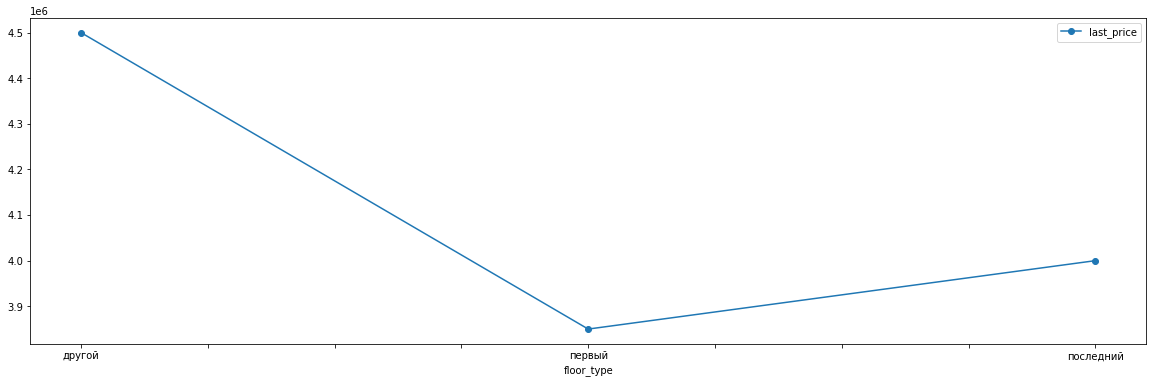

In [77]:
draw_plot_line(data, 'last_price', 'floor_type')

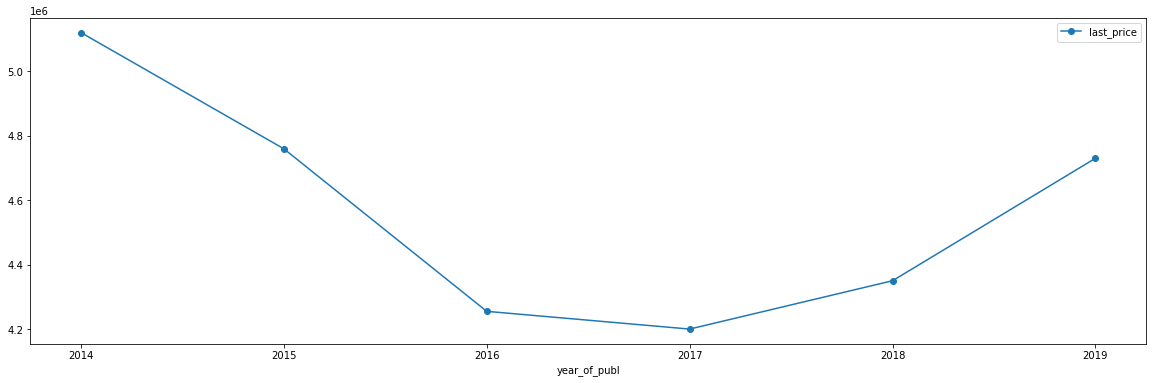

In [78]:
draw_plot_line(data, 'last_price', 'year_of_publ')

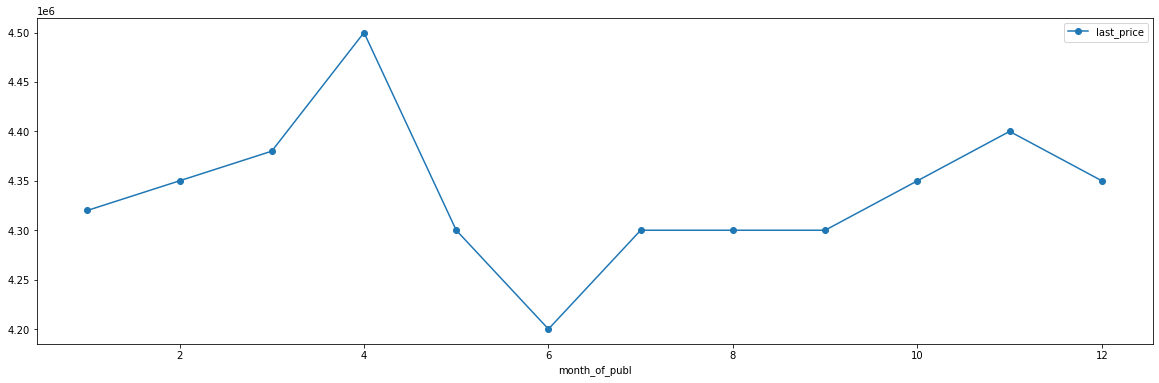

In [79]:
draw_plot_line(data, 'last_price', 'month_of_publ')

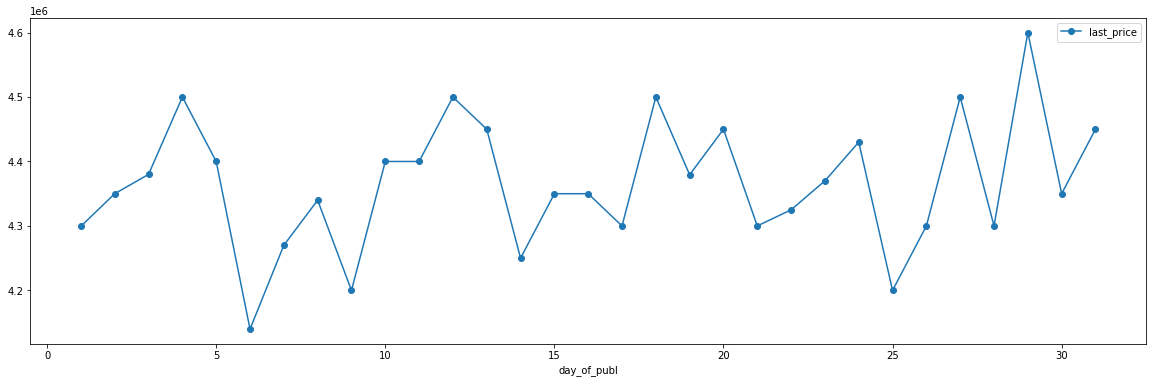

In [80]:
draw_plot_line(data, 'last_price', 'day_of_publ')

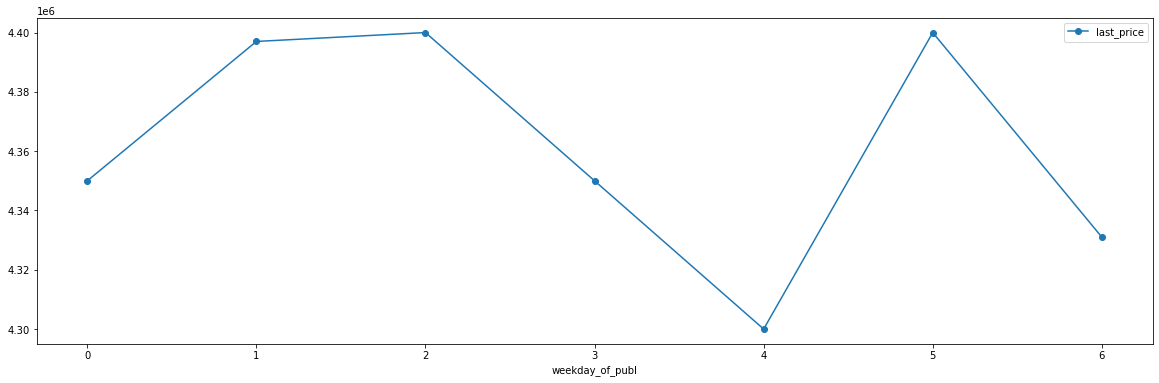

In [81]:
draw_plot_line(data, 'last_price', 'weekday_of_publ')

--------------------------------------------------------------------------------------------------------------------

#### Вывод по третьей части

- Финальная стоимость квартиры имеет почти линейную зависимость от количества комнат. Появляется полка в стоимости квартир с пятью и более комнатами.
- Влияние роста общей площади квартиры можно назвать линейным по отношению к её цене, так как большинство точек укладывается в строгую полосу.
- Влияние площади жилых помещений квартиры также близко к линейному, однако всё больше заметен разброс точек по графику, что говорит нам о вариативности предложений по этому кретерию.
- А вот влияние площади кухни на конечную стоимость можно назвать степенным (похоже на функцию $ a*x^{\frac{1}{t}}+b $)

- Фактор этажа сильно влияет на стоимость жилья. Так выходит, что никто не хочет покупать квартиры на первом этаже, чуть более охотно берут последний этаж. И вишенка на торте с самыми дорогими квартирами, расположеными ни на первом и не на последнем этаже
- В 2014 году начался всем известный кризис, что ярко отображено в динамике цен на недвижимость по годам. Пик в 2014 году и резкий спад к 2016. За последующие два года ситуация стабилизировалась и цены почти вернулись к докризисному уровню 2014.
- Цена на квартиры больше всего весной, после чего летом заметен резкий провал, стабилизация ситуации к осени-зиме 
- Цена проданной квартиры выше в первой половине недели.

### IV. Средняя цена квадратного метра 

In [82]:
#Чтобы выполнить данную задачку нам явно понадобятся сводные таблицы. Найдем для начала название населенных пунктов в которых у нас самое большое количество обьявлений
data_top = data.pivot_table(index = 'locality_name', values = 'last_price', aggfunc ='count') # В качестве values можно взять, что угодно где нет пропусков
data_top.columns = ['count']
data_top = data_top.sort_values(by ='count',  ascending=False)
data_top = data_top.head(10)
data_top

,count
locality_name,
санкт-петербург,12883
мурино,583
кудрово,460
шушары,436
всеволожск,378
колпино,333
парголово,325
пушкин,318
гатчина,293


In [83]:
data_square_price = (data.query('locality_name in @data_top.index')
              .pivot_table(index= 'locality_name', values= 'square_meter_price', aggfunc= 'mean')
              .sort_values(by= 'square_meter_price', ascending=False))
data_square_price

,square_meter_price
locality_name,
санкт-петербург,103238.862222
пушкин,99945.568302
кудрово,95166.574717
парголово,90334.599262
мурино,86035.029863
шушары,78585.183096
колпино,75253.996036
гатчина,68924.376280
всеволожск,66914.058175


#### Вывод по четвертой части
- Ожидаемо из нашей выборки городом с самым дорогим квадратным метром стал Санкт-Петербург, предлагая покупателям метр по цене в `104048 рублей`
- Самые дешевые квадратные метры можно найти в Выборге и получить один метр за `58182 рублей`
- Занимательно, что цена в городе Пушкин всего на `3000 рублей` ниже Питерской

### V. Санкт-Петербург, стоимость квадратного метра

In [84]:
data_spb = data.query('locality_name == "санкт-петербург"')
data_spb #ура, получили выборку по санкт-петербургу, теперь уменьшим её выбрав только те строки, где расстояние до центра указано.

,balcony_count,rooms_count,living_area,kitchen_area,total_area,ceiling_height,floor,total_floors,locality_name,nearest_city_center_distance,nearest_airport_distance,parks_in_3km_count,nearest_park_distance,ponds_in_3km_count,nearest_pond_distance,total_images,last_price,date_of_publication,days_before_remove,is_apartment,is_studio,is_open_plan,square_meter_price,year_of_publ,month_of_publ,day_of_publ,weekday_of_publ,floor_type,living_area_part,kitchen_area_part
2,0,2,34.3,8.3,56.0,2.65,4,5,санкт-петербург,14.0,21741.0,1,90.0,2,574.0,10,5196000,2015-08-20,558.0,True,False,False,92785.71,2015,8,20,3,другой,0.61,0.15
7,2,2,38.0,18.9,71.6,2.65,22,24,санкт-петербург,12.0,23982.0,0,4000.0,0,4000.0,5,7915000,2019-04-18,NaN,True,False,False,110544.69,2019,4,18,3,другой,0.53,0.26
9,2,3,43.6,6.5,61.0,2.50,7,9,санкт-петербург,15.0,50898.0,0,4000.0,0,4000.0,18,5400000,2017-02-26,289.0,True,False,False,88524.59,2017,2,26,6,другой,0.71,0.11
10,0,1,20.3,8.5,39.6,2.67,3,12,санкт-петербург,14.0,38357.0,1,310.0,2,553.0,5,5050000,2017-11-16,137.0,True,False,False,127525.25,2017,11,16,3,другой,0.51,0.21
15,1,1,20.5,7.6,39.0,2.65,5,14,санкт-петербург,14.0,12900.0,1,590.0,1,296.0,16,4650000,2017-11-18,19.0,True,False,False,119230.77,2017,11,18,5,другой,0.53,0.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23552,2,1,20.0,11.0,39.0,2.65,6,9,санкт-петербург,17.0,40837.0,0,4000.0,0,4000.0,6,3200000,2017-12-16,38.0,True,False,False,82051.28,2017,12,16,5,другой,0.51,0.28
23553,0,3,63.0,15.0,101.0,3.05,12,15,санкт-петербург,14.0,15632.0,0,4000.0,0,4000.0,19,9200000,2019-04-01,23.0,True,False,False,91089.11,2019,4,1,0,другой,0.62,0.15
23554,2,1,16.3,9.1,35.3,2.86,4,15,санкт-петербург,16.0,17284.0,1,353.0,2,652.0,13,3550000,2018-02-28,29.0,True,False,False,100566.57,2018,2,28,2,другой,0.46,0.26
23555,0,2,31.0,6.0,52.0,2.65,2,5,санкт-петербург,6.0,20151.0,1,300.0,0,4000.0,3,5500000,2018-07-19,15.0,True,False,False,105769.23,2018,7,19,3,другой,0.60,0.12


In [85]:
data_spb = data_spb.dropna(subset= ['nearest_city_center_distance'])
data_spb = data_spb.reset_index(drop=True)

In [86]:
data_spb.isnull().sum()

balcony_count                      0
rooms_count                        0
living_area                        0
kitchen_area                       0
total_area                         0
ceiling_height                     0
floor                              0
total_floors                       0
locality_name                      0
nearest_city_center_distance       0
nearest_airport_distance          10
parks_in_3km_count                 0
nearest_park_distance              0
ponds_in_3km_count                 0
nearest_pond_distance              0
total_images                       0
last_price                         0
date_of_publication                0
days_before_remove              1282
is_apartment                       0
is_studio                          0
is_open_plan                       0
square_meter_price                 0
year_of_publ                       0
month_of_publ                      0
day_of_publ                        0
weekday_of_publ                    0
f

После подготовки данный предстоит сгруппировать все предложения в санкт-петербурге по киллометрам удаленности от центра

In [87]:
data_spb = data_spb.pivot_table(index= 'nearest_city_center_distance', values='square_meter_price', aggfunc=['mean','count'])

In [88]:
data_spb.columns= ['mean_meter_price', 'count']
data_spb

,mean_meter_price,count
nearest_city_center_distance,,
0.0,102469.892857,7
1.0,109587.650000,80
2.0,108703.949324,148
3.0,106208.841090,211
4.0,108267.517839,384
5.0,112290.715839,471
6.0,114761.998314,350
7.0,112601.828854,253
8.0,111973.073830,423


array([[<AxesSubplot:title={'center':'mean_meter_price'}>,
        <AxesSubplot:title={'center':'count'}>]], dtype=object)

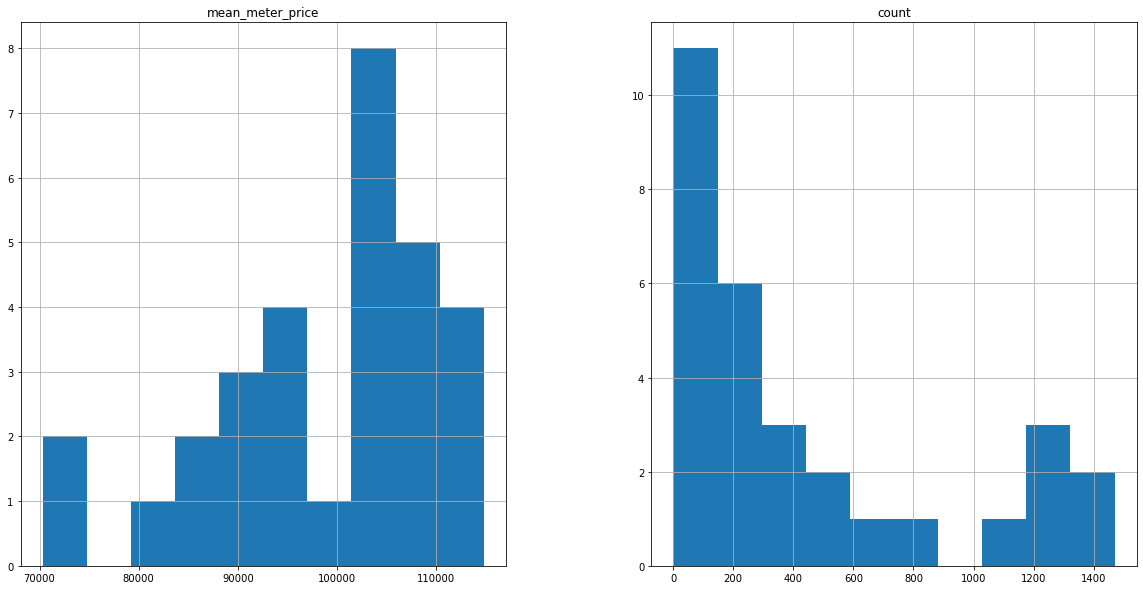

In [89]:
data_spb.hist(figsize=(20,10))

<AxesSubplot:xlabel='nearest_city_center_distance'>

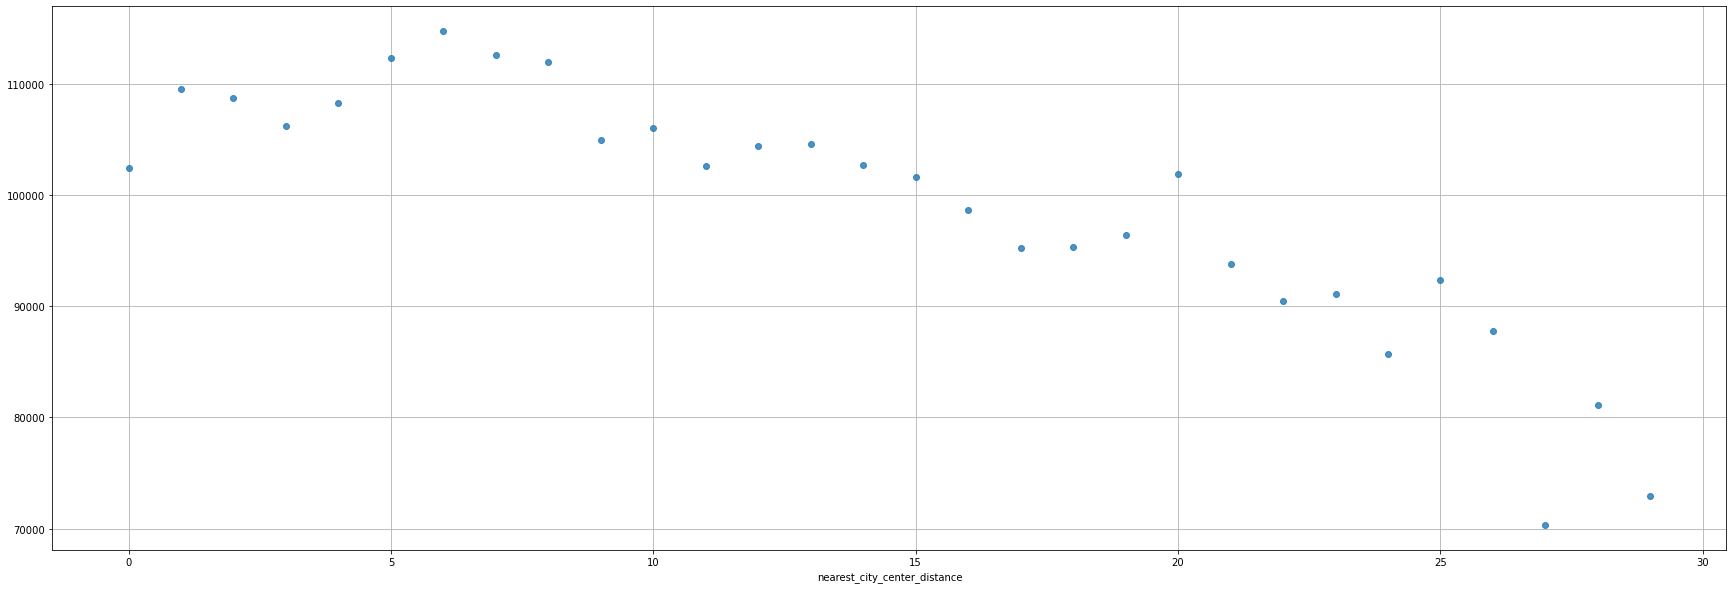

In [90]:
data_spb['mean_meter_price'].plot(style ='o', grid= True, figsize= (30,10), alpha= 0.8)

#### Вывод по пятой части

- Исследование подтвердило логичное предположение, что чем ближе квартира находится к центру, тем выше стоимость квадратного метра. 
- Важно отметить, что самый дорогой квадратный метр у квартир на удалении от 4 до 8 км от центра. Думаю, что это связано с возрастом исторической застройки центра, сложностью преобретения такой недвижимости, устаревшей планировкой и многими сопутствующими деталями сделки.
- Наблюдается равномерный спад цен начиная с 15 киллометра от центра, при том увеличивается и разброс цен. Разброс я связываю с разнообразием классов предоставленного жилья, будь то 'эконом' 'комфорт' 'премиум'.

## Общий вывод

#### Задача — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.
- Поставленная задача на мой вгляд была выполнена в полном объеме. Данные были предобработаны, удалены явные и неявные дубликаты, устранены выбросы.
- Были расчитаны и добавлены следующие параметры:
    - цена одного квадратного метра;
    - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
    - месяц публикации объявления;
    - год публикации объявления;
    - тип этажа квартиры (значения — «первый», «последний», «другой»);
- Выполнены все поставленные задачи по изучению влияния параметров на финальную стоимость квартиры.

- Итогом проведенного исследования можно считать выявленные наиболее важные параметры, которые стоит учитывать при продаже\покупке недвижимости:
    - Город
    - Площадь квартиры
    - Количество комнат
    - Расстояние до центра
    - Этаж на котором располагается квартира